## The Congressional Voting dataset

The dataset is about certeain votings of congress members to certein political points. 
Is has 17 categorical variables. The variable "class" determines whether this ID belongs to the republican or the democrat party. The other 16 variables are political issues. The politians can be pro or con to these points. Further they can not vote at all. That's why all these variables has either "y" for yes or "n" for no or "unkown" which stans for not voted. 

### Importing the datasets

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV



traindata = pd.read_csv(r'C:\Users\noahw\OneDrive\Desktop\ML\CongressionalVotingID.shuf.lrn.csv') 
testdata = pd.read_csv(r'C:\Users\noahw\OneDrive\Desktop\ML\CongressionalVotingID.shuf.tes.csv')
resultdata = pd.read_csv(r'C:\Users\noahw\OneDrive\Desktop\ML\CongressionalVotingID.shuf.sol.ex.csv')  


In [91]:
traindata.head()


,ID,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,356,republican,y,n,y,y,n,n,n,y,y,y,n,n,n,y,y,y
1,29,republican,y,n,n,y,y,n,y,y,y,n,n,y,y,y,n,y
2,344,republican,n,n,n,y,y,n,y,n,y,y,n,n,n,y,n,y
3,396,democrat,y,y,y,unknown,n,n,n,y,n,n,y,unknown,n,n,y,y
4,32,democrat,y,y,y,n,n,n,y,y,y,n,y,n,n,n,y,unknown


## Data Exploration

In [92]:
traindata['class'].value_counts()

democrat      138
republican     80
Name: class, dtype: int64

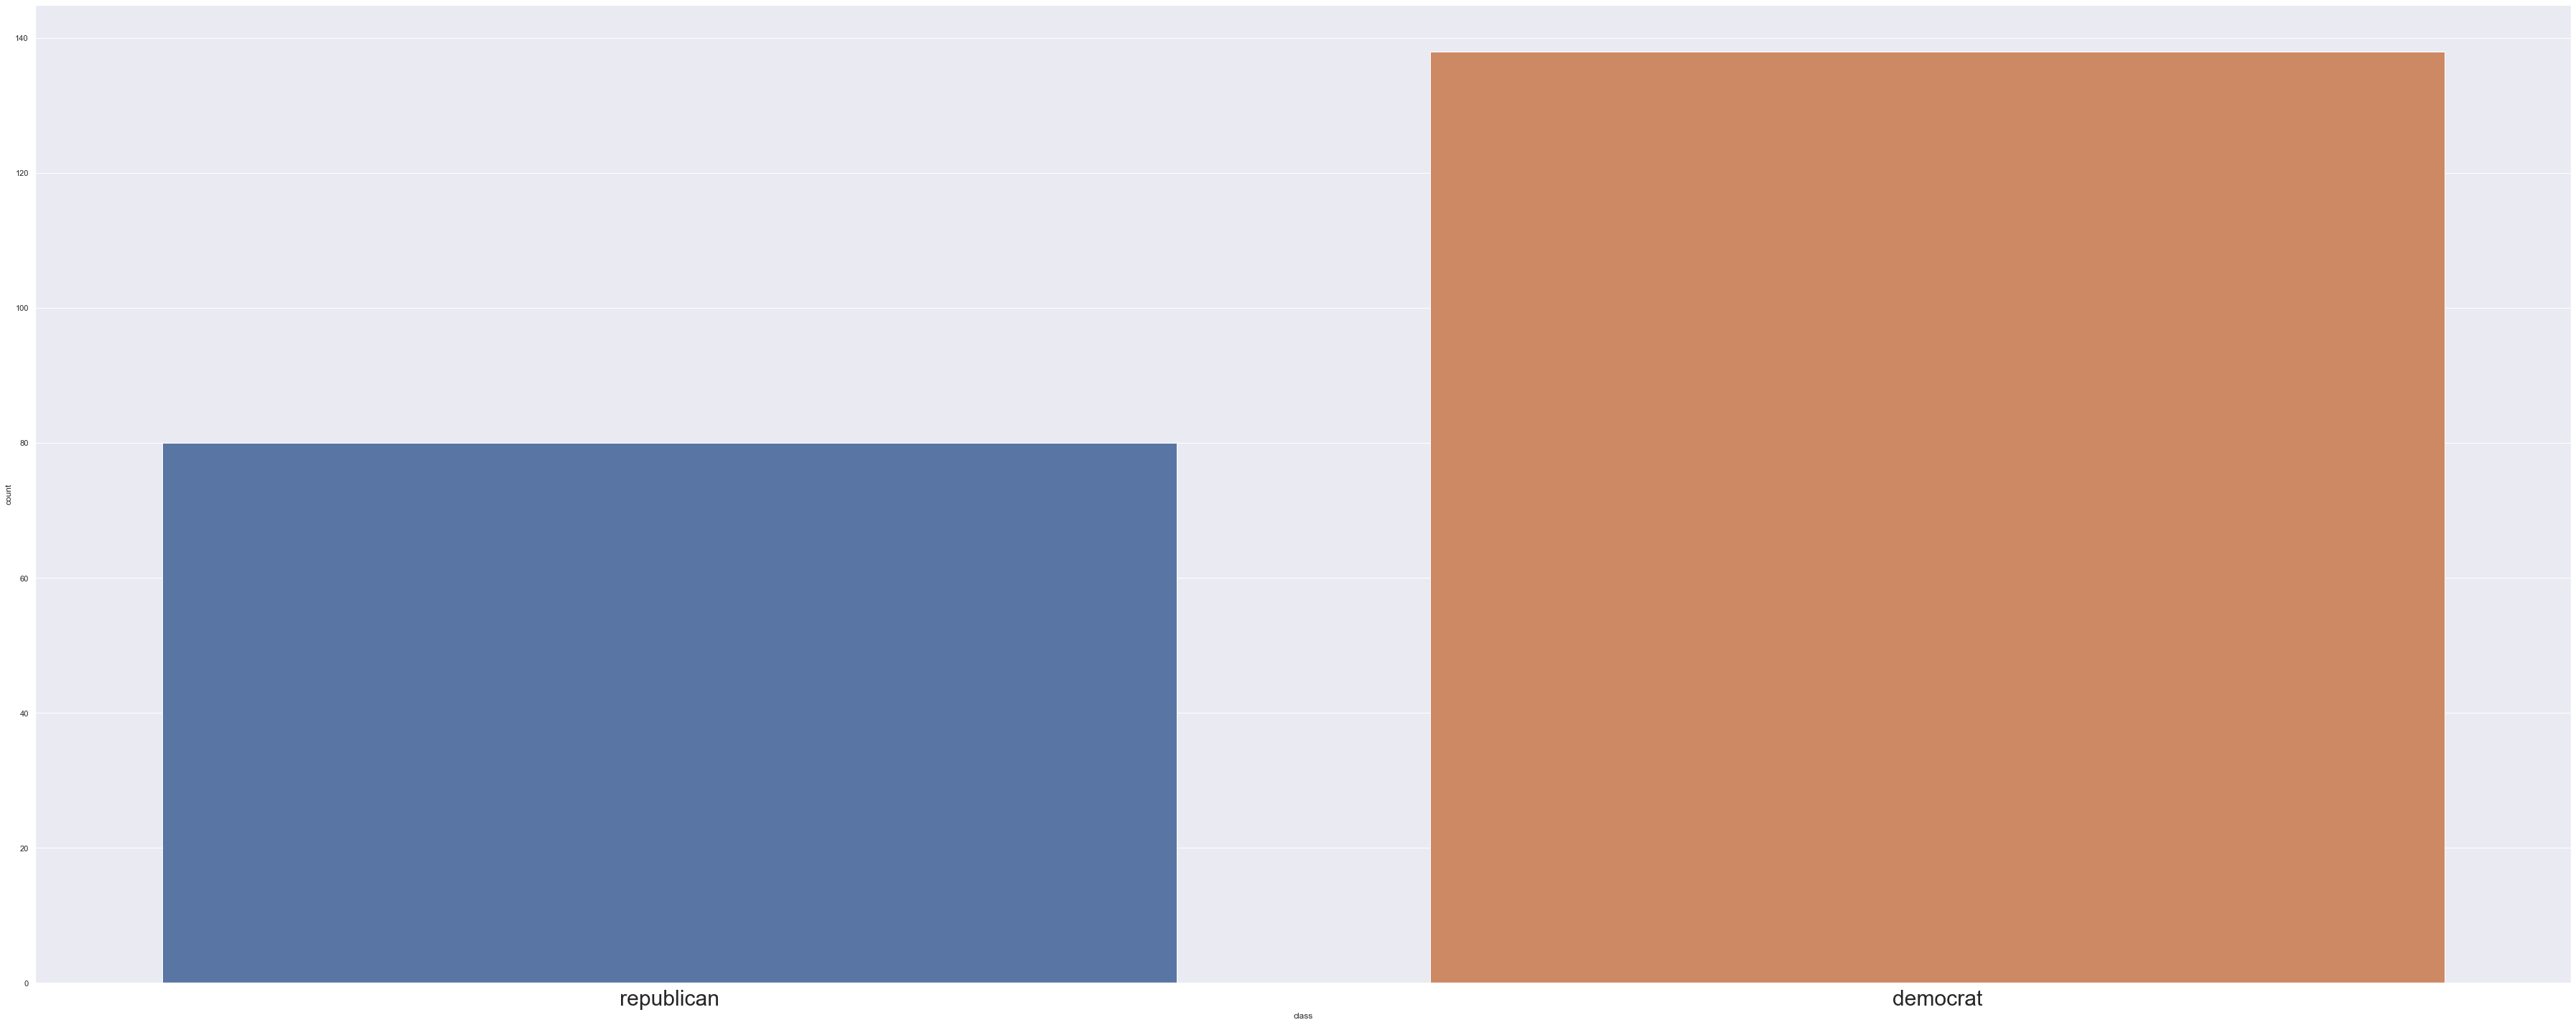

In [93]:
plt.figure(figsize = (50,20))
sns.set(style="darkgrid")
ax = sns.countplot(x='class',data=traindata)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 30)
plt.tight_layout()

The plot shows the amount of democtras and rebulicans in the traindata. 

## Preprocessing the dataset

### Encoding the variables

In [5]:
dummies_handicapped = pd.get_dummies(traindata['handicapped-infants'])
dummies_water = pd.get_dummies(traindata['water-project-cost-sharing'])
dummies_adoption = pd.get_dummies(traindata['adoption-of-the-budget-resolution'])
dummies_physician = pd.get_dummies(traindata['physician-fee-freeze'])
dummies_salvador = pd.get_dummies(traindata['el-salvador-aid'])
dummies_religious = pd.get_dummies(traindata['religious-groups-in-schools'])
dummies_satellite = pd.get_dummies(traindata['anti-satellite-test-ban'])
dummies_aid = pd.get_dummies(traindata['aid-to-nicaraguan-contras'])
dummies_mx = pd.get_dummies(traindata['mx-missile'])
dummies_immi = pd.get_dummies(traindata['immigration'])
dummies_synfuels = pd.get_dummies(traindata['synfuels-crporation-cutback'])
dummies_edu = pd.get_dummies(traindata['education-spending'])
dummies_super = pd.get_dummies(traindata['superfund-right-to-sue'])
dummies_crime = pd.get_dummies(traindata['crime'])
dummies_duty = pd.get_dummies(traindata['duty-free-exports'])
dummies_export = pd.get_dummies(traindata['export-administration-act-south-africa'])



tdummies_handicapped = pd.get_dummies(testdata['handicapped-infants'])
tdummies_water = pd.get_dummies(testdata['water-project-cost-sharing'])
tdummies_adoption = pd.get_dummies(testdata['adoption-of-the-budget-resolution'])
tdummies_physician = pd.get_dummies(testdata['physician-fee-freeze'])
tdummies_salvador = pd.get_dummies(testdata['el-salvador-aid'])
tdummies_religious = pd.get_dummies(testdata['religious-groups-in-schools'])
tdummies_satellite = pd.get_dummies(testdata['anti-satellite-test-ban'])
tdummies_aid = pd.get_dummies(testdata['aid-to-nicaraguan-contras'])
tdummies_mx = pd.get_dummies(testdata['mx-missile'])
tdummies_immi = pd.get_dummies(testdata['immigration'])
tdummies_synfuels = pd.get_dummies(testdata['synfuels-crporation-cutback'])
tdummies_edu = pd.get_dummies(testdata['education-spending'])
tdummies_super = pd.get_dummies(testdata['superfund-right-to-sue'])
tdummies_crime = pd.get_dummies(testdata['crime'])
tdummies_duty = pd.get_dummies(testdata['duty-free-exports'])
tdummies_export = pd.get_dummies(testdata['export-administration-act-south-africa'])

The reason why I use one hot encoding on the traindata ist that we have three different variables (yes, no, unknown). Further you can not order them.

In [6]:
df_test = pd.concat([tdummies_handicapped, tdummies_adoption, tdummies_physician, tdummies_salvador, tdummies_satellite, tdummies_aid, tdummies_mx, tdummies_super, tdummies_crime], axis=1)

df_train = pd.concat([dummies_handicapped, dummies_adoption, dummies_physician, dummies_salvador, dummies_satellite, dummies_aid, dummies_mx, dummies_super, dummies_crime], axis=1)




In [7]:
df_test

,n,unknown,y,n,unknown,y,n,unknown,y,n,...,y,n,unknown,y,n,unknown,y,n,unknown,y
0,1,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1
1,1,0,0,1,0,0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,1
2,0,0,1,0,0,1,1,0,0,1,...,1,0,0,1,1,0,0,1,0,0
3,1,0,0,1,0,0,0,0,1,0,...,1,1,0,0,0,0,1,0,0,1
4,1,0,0,1,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,0,0,1,0,0,1,1,0,0,1,...,1,0,0,1,1,0,0,1,0,0
213,1,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1
214,0,0,1,0,0,1,1,0,0,1,...,1,0,0,1,0,1,0,1,0,0
215,0,0,1,0,0,1,1,0,0,1,...,1,0,0,1,1,0,0,1,0,0


In [8]:
partymap = {'republican':1,'democrat':0}
ytraining = traindata['class'].map(partymap)
ytest = resultdata['class'].map(partymap)


In [9]:
clf = neighbors.KNeighborsClassifier()
clf.fit(df_train, ytraining)

acc = clf.score(df_test, ytest)
acc

0.4147465437788018

In [10]:
model = LogisticRegression()


In [11]:
model.fit(df_train, ytraining)

LogisticRegression()

In [12]:
model.predict(df_test)

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

In [13]:
pre = model.score(df_test, ytest)
pre

0.41935483870967744

In [14]:
from sklearn.ensemble import RandomForestClassifier
clf1=RandomForestClassifier(n_estimators=100)
clf1.fit(df_train,ytraining)

RandomForestClassifier()

In [15]:
y_pred=clf1.predict(df_test)

In [16]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))

Accuracy: 0.4055299539170507


In [17]:
imp = SimpleImputer(strategy="most_frequent")
X = imp.fit_transform(df_train)

In [69]:
def evaluate_model(X, y, model):
    K = 5
    R = 3
    cv = RepeatedStratifiedKFold(n_splits=K, n_repeats=R, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

#Classification modell
def get_models():
    models, names = list(), list()
    # SVM
    models.append(LogisticRegression())
    names.append('LG')
    
    models.append(KNeighborsClassifier())
    names.append('KNN')
    
    models.append(RandomForestClassifier(n_estimators=1000))
    names.append('RF')
    
    models.append(ExtraTreesClassifier(n_estimators=1000))
    names.append('ET')
    
    return models, names

#Bewertung ACC modell
def evaluate(model, test_features, test_labels):
    probs_votos = model.predict_proba(test_features)
    accuracy = roc_auc_score(test_labels, probs_votos[:,1])
    return accuracy

In [70]:
models, names = get_models()

results = list()

for i in range(len(models)):
    scores = evaluate_model(X, y, models[i])
    results.append(scores)
    print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))

plt.boxplot(results, labels=names, showmeans=True)
plt.show()

NameError: name 'y' is not defined

## Preprocessing 2 (impute unknown)

In [94]:
ynmap = {'y':1,'n':0, 'unknown': np.nan}
partymap = {'republican':1,'democrat':0}
traindata['republican'] = traindata['class'].map(partymap)
traindata.drop('class',axis=1,inplace=True)
for column in traindata.columns.drop('republican'):
    traindata[column+'1'] = traindata[column].map(ynmap)
    traindata.drop(column,axis=1,inplace=True)
partymap = {'republican':1,'democrat':0}
data_col = traindata.columns

In [95]:
combineddata = pd.concat([testdata, resultdata], axis = 1, sort = False)
combineddata = combineddata.drop("ID", axis = 1)

In [96]:
ynmap = {'y':1,'n':0,'unknown':2}
partymap = {'republican':0,'democrat':1}
combineddata['republican'] = combineddata['class'].map(partymap)
combineddata.drop('class',axis=1,inplace=True)
for column in combineddata.columns.drop('republican'):
    combineddata[column+'1'] = combineddata[column].map(ynmap)
    combineddata.drop(column,axis=1,inplace=True)
partymap = {'republican':1,'democrat':0}
data_col = combineddata.columns

In [97]:
traindata.isnull().sum()

republican                                   0
ID1                                        218
handicapped-infants1                         7
water-project-cost-sharing1                 24
adoption-of-the-budget-resolution1           9
physician-fee-freeze1                        7
el-salvador-aid1                             6
religious-groups-in-schools1                 5
anti-satellite-test-ban1                     7
aid-to-nicaraguan-contras1                   5
mx-missile1                                  9
immigration1                                 2
synfuels-crporation-cutback1                12
education-spending1                         15
superfund-right-to-sue1                     12
crime1                                       8
duty-free-exports1                          19
export-administration-act-south-africa1     50
dtype: int64

In [98]:
traindata.drop("ID1", inplace=True, axis=1)

In [99]:
traindata.drop("export-administration-act-south-africa1", inplace=True, axis=1)

In [100]:
traindata['class'] = np.where(traindata['republican'] == 1, 1, 0)

In [101]:
traindata.head(218)

,republican,handicapped-infants1,water-project-cost-sharing1,adoption-of-the-budget-resolution1,physician-fee-freeze1,el-salvador-aid1,religious-groups-in-schools1,anti-satellite-test-ban1,aid-to-nicaraguan-contras1,mx-missile1,immigration1,synfuels-crporation-cutback1,education-spending1,superfund-right-to-sue1,crime1,duty-free-exports1,class
0,1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1
1,1,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1
2,1,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1
3,0,1.0,1.0,1.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,0.0,0.0,1.0,0
4,0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,0,1.0,1.0,1.0,0.0,0.0,NaN,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
214,0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0
215,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0
216,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1


In [102]:
traindata['class'].value_counts()

0    138
1     80
Name: class, dtype: int64

The training dataset contains 80 votings of republicans and 138 vontings of democrats. 

In [103]:
traindata.groupby('handicapped-infants1')['class'].value_counts()

handicapped-infants1  class
0.0                   1        61
                      0        53
1.0                   0        80
                      1        17
Name: class, dtype: int64

In [104]:
traindata['handicapped-infants1'].value_counts()

0.0    114
1.0     97
Name: handicapped-infants1, dtype: int64

In [105]:
traindata.groupby('handicapped-infants1')['class'].mean().sort_values(ascending = False)

handicapped-infants1
0.0    0.535088
1.0    0.175258
Name: class, dtype: float64

The outcome says that the majority of the republicans voted for no in this case. 

In [106]:
traindata.at[76, 'handicapped-infants1'] =0
traindata.at[118, 'handicapped-infants1'] =1
traindata.at[127, 'handicapped-infants1'] =1
traindata.at[149, 'handicapped-infants1'] =0
traindata.at[177, 'handicapped-infants1'] =1
traindata.at[182, 'handicapped-infants1'] =1
traindata.at[194, 'handicapped-infants1'] =1

In [107]:
traindata.groupby('adoption-of-the-budget-resolution1')['class'].value_counts()

adoption-of-the-budget-resolution1  class
0.0                                 1         66
                                    0         18
1.0                                 0        114
                                    1         11
Name: class, dtype: int64

In [108]:
traindata.groupby('adoption-of-the-budget-resolution1')['class'].mean().sort_values(ascending = False)

adoption-of-the-budget-resolution1
0.0    0.785714
1.0    0.088000
Name: class, dtype: float64

In [109]:
traindata.at[32, 'adoption-of-the-budget-resolution1'] =1
traindata.at[52, 'adoption-of-the-budget-resolution1'] =1
traindata.at[61, 'adoption-of-the-budget-resolution1'] =1
traindata.at[76, 'adoption-of-the-budget-resolution1'] =0
traindata.at[118, 'adoption-of-the-budget-resolution1'] =1
traindata.at[127, 'adoption-of-the-budget-resolution1'] =1
traindata.at[178, 'adoption-of-the-budget-resolution1'] =0
traindata.at[194, 'adoption-of-the-budget-resolution1'] =1
traindata.at[216, 'adoption-of-the-budget-resolution1'] =0

In [110]:
traindata.groupby('physician-fee-freeze1')['class'].value_counts()

physician-fee-freeze1  class
0.0                    0        124
                       1          1
1.0                    1         77
                       0          9
Name: class, dtype: int64

In [111]:
traindata.groupby('physician-fee-freeze1')['class'].mean().sort_values(ascending = False)

physician-fee-freeze1
1.0    0.895349
0.0    0.008000
Name: class, dtype: float64

In [112]:
traindata.at[3, 'physician-fee-freeze1'] =0
traindata.at[35, 'physician-fee-freeze1'] =0
traindata.at[52, 'physician-fee-freeze1'] =0
traindata.at[76, 'physician-fee-freeze1'] =1
traindata.at[127, 'physician-fee-freeze1'] =0
traindata.at[194, 'physician-fee-freeze1'] =0
traindata.at[216, 'physician-fee-freeze1'] =1

In [113]:
traindata.groupby('el-salvador-aid1')['class'].value_counts()

el-salvador-aid1  class
0.0               0        100
                  1          5
1.0               1         74
                  0         33
Name: class, dtype: int64

In [114]:
traindata.groupby('el-salvador-aid1')['class'].mean().sort_values(ascending = False)

el-salvador-aid1
1.0    0.691589
0.0    0.047619
Name: class, dtype: float64

In [115]:
traindata.at[52, 'el-salvador-aid1'] =0
traindata.at[79, 'el-salvador-aid1'] =0
traindata.at[106, 'el-salvador-aid1'] =0
traindata.at[127, 'el-salvador-aid1'] =0
traindata.at[167, 'el-salvador-aid1'] =0
traindata.at[216, 'el-salvador-aid1'] =1

In [116]:
traindata.groupby('religious-groups-in-schools1')['class'].value_counts()

religious-groups-in-schools1  class
0.0                           0        68
                              1        11
1.0                           1        68
                              0        66
Name: class, dtype: int64

In this case the democrats are very differents opinons. It is alsmos 50/50 here. Thats why I drop this point.

In [117]:
traindata.groupby('religious-groups-in-schools1')['class'].mean().sort_values(ascending = False)

religious-groups-in-schools1
1.0    0.507463
0.0    0.139241
Name: class, dtype: float64

In [118]:
traindata.groupby('anti-satellite-test-ban1')['class'].value_counts()

anti-satellite-test-ban1  class
0.0                       1        57
                          0        36
1.0                       0        98
                          1        20
Name: class, dtype: int64

In [119]:
traindata.groupby('anti-satellite-test-ban1')['class'].mean().sort_values(ascending = False)

anti-satellite-test-ban1
0.0    0.612903
1.0    0.169492
Name: class, dtype: float64

In [120]:
traindata.at[50, 'anti-satellite-test-ban1'] =0
traindata.at[77, 'anti-satellite-test-ban1'] =0
traindata.at[90, 'anti-satellite-test-ban1'] =1
traindata.at[127, 'anti-satellite-test-ban1'] =1
traindata.at[146, 'anti-satellite-test-ban1'] =1
traindata.at[157, 'anti-satellite-test-ban1'] =1
traindata.at[216, 'anti-satellite-test-ban1'] =0

In [121]:
traindata.groupby('aid-to-nicaraguan-contras1')['class'].value_counts()

aid-to-nicaraguan-contras1  class
0.0                         1         63
                            0         24
1.0                         0        113
                            1         13
Name: class, dtype: int64

In [122]:
traindata.groupby('aid-to-nicaraguan-contras1')['class'].mean().sort_values(ascending = False)

aid-to-nicaraguan-contras1
0.0    0.724138
1.0    0.103175
Name: class, dtype: float64

In [123]:
traindata.at[29, 'aid-to-nicaraguan-contras1'] =0
traindata.at[50, 'aid-to-nicaraguan-contras1'] =0
traindata.at[82, 'aid-to-nicaraguan-contras1'] =0
traindata.at[127, 'aid-to-nicaraguan-contras1'] =1
traindata.at[216, 'aid-to-nicaraguan-contras1'] =0


In [124]:
traindata.groupby('mx-missile1')['class'].value_counts()

mx-missile1  class
0.0          1        67
             0        35
1.0          0        95
             1        12
Name: class, dtype: int64

In [125]:
traindata.groupby('mx-missile1')['class'].mean().sort_values(ascending = False)

mx-missile1
0.0    0.656863
1.0    0.112150
Name: class, dtype: float64

In [126]:
traindata.at[67, 'mx-missile1'] =1
traindata.at[90, 'mx-missile1'] =1
traindata.at[146, 'mx-missile1'] =1
traindata.at[174, 'mx-missile1'] =1
traindata.at[177, 'mx-missile1'] =1
traindata.at[179, 'mx-missile1'] =1
traindata.at[180, 'mx-missile1'] =1
traindata.at[183, 'mx-missile1'] =1
traindata.at[216, 'mx-missile1'] =0


In [127]:
traindata.groupby('immigration1')['class'].value_counts()

immigration1  class
0.0           0        72
              1        30
1.0           0        65
              1        49
Name: class, dtype: int64

In [128]:
traindata.groupby('immigration1')['class'].mean().sort_values(ascending = False)

immigration1
1.0    0.429825
0.0    0.294118
Name: class, dtype: float64

It is not a clear voting here.

In [129]:
traindata.groupby('synfuels-crporation-cutback1')['class'].value_counts()

synfuels-crporation-cutback1  class
0.0                           0        64
                              1        60
1.0                           0        68
                              1        14
Name: class, dtype: int64

In [130]:
traindata.groupby('synfuels-crporation-cutback1')['class'].mean().sort_values(ascending = False)

synfuels-crporation-cutback1
0.0    0.483871
1.0    0.170732
Name: class, dtype: float64

Same here.

In [131]:
traindata.groupby('education-spending1')['class'].value_counts()

education-spending1  class
0.0                  0        116
                     1         12
1.0                  1         58
                     0         17
Name: class, dtype: int64

In [132]:
traindata.groupby('education-spending1')['class'].mean().sort_values(ascending = False)

education-spending1
1.0    0.773333
0.0    0.093750
Name: class, dtype: float64

Too many missing values here.

In [133]:
traindata.groupby('superfund-right-to-sue1')['class'].value_counts()

superfund-right-to-sue1  class
0.0                      0        85
                         1        12
1.0                      1        64
                         0        45
Name: class, dtype: int64

In [134]:
traindata.groupby('superfund-right-to-sue1')['class'].mean().sort_values(ascending = False)

superfund-right-to-sue1
1.0    0.587156
0.0    0.123711
Name: class, dtype: float64

In [135]:
traindata.at[29, 'superfund-right-to-sue1'] =1
traindata.at[50, 'superfund-right-to-sue1'] =1
traindata.at[55, 'superfund-right-to-sue1'] =0
traindata.at[97, 'superfund-right-to-sue1'] =0
traindata.at[127, 'superfund-right-to-sue1'] =0
traindata.at[132, 'superfund-right-to-sue1'] =0
traindata.at[137, 'superfund-right-to-sue1'] =0
traindata.at[172, 'superfund-right-to-sue1'] =0
traindata.at[177, 'superfund-right-to-sue1'] =0
traindata.at[190, 'superfund-right-to-sue1'] =0
traindata.at[210, 'superfund-right-to-sue1'] =1
traindata.at[216, 'superfund-right-to-sue1'] =1


In [136]:
traindata.groupby('crime1')['class'].value_counts()

crime1  class
0.0     0        82
        1         3
1.0     1        75
        0        50
Name: class, dtype: int64

In [137]:
traindata.groupby('crime1')['class'].mean().sort_values(ascending = False)

crime1
1.0    0.600000
0.0    0.035294
Name: class, dtype: float64

In [138]:
traindata.at[27, 'crime1'] =1
traindata.at[50, 'crime1'] =1
traindata.at[79, 'crime1'] =0
traindata.at[127, 'crime1'] =0
traindata.at[155, 'crime1'] =0
traindata.at[167, 'crime1'] =0
traindata.at[172, 'crime1'] =0
traindata.at[177, 'crime1'] =0

In [139]:
traindata.drop("religious-groups-in-schools1", inplace=True, axis=1)

In [140]:
traindata.drop("immigration1", inplace=True, axis=1)

In [141]:
traindata.drop("synfuels-crporation-cutback1", inplace=True, axis=1)

In [142]:
traindata.drop("education-spending1", inplace=True, axis=1)

In [143]:
traindata.drop("duty-free-exports1", inplace=True, axis=1)

In [144]:
traindata.isnull().sum()

republican                             0
handicapped-infants1                   0
water-project-cost-sharing1           24
adoption-of-the-budget-resolution1     0
physician-fee-freeze1                  0
el-salvador-aid1                       0
anti-satellite-test-ban1               0
aid-to-nicaraguan-contras1             0
mx-missile1                            0
superfund-right-to-sue1                0
crime1                                 0
class                                  0
dtype: int64

In [145]:
traindata.drop("water-project-cost-sharing1", inplace=True, axis=1)

In [146]:
traindata.isnull().sum()

republican                            0
handicapped-infants1                  0
adoption-of-the-budget-resolution1    0
physician-fee-freeze1                 0
el-salvador-aid1                      0
anti-satellite-test-ban1              0
aid-to-nicaraguan-contras1            0
mx-missile1                           0
superfund-right-to-sue1               0
crime1                                0
class                                 0
dtype: int64

## Model training and prediction

#### KNN

In [147]:
y = traindata['class']

In [148]:
X_train, X_test, y_train, y_test = train_test_split(traindata, y, test_size=0.5)

In [149]:
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)

acc = clf.score(X_test, y_test)
acc

1.0

#### Logistic Regression

In [150]:
model = LogisticRegression()

In [151]:
model.fit(X_train, y_train)

LogisticRegression()

In [152]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0])

In [153]:
pre = model.score(X_test, y_test)
pre

1.0

#### Random Forest

In [154]:
from sklearn.ensemble import RandomForestClassifier
clf1=RandomForestClassifier(n_estimators=100)
clf1.fit(X_train,y_train)

RandomForestClassifier()

In [155]:
y_pred=clf1.predict(X_test)


In [156]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [157]:
y_tr = traindata['republican']
y_te = combineddata['republican']
X_tr = traindata.drop('republican', axis = 1)
X_te = combineddata.drop('republican', axis = 1)
X_te.drop("religious-groups-in-schools1", inplace=True, axis=1)
X_te.drop("immigration1", inplace=True, axis=1)
X_te.drop("synfuels-crporation-cutback1", inplace=True, axis=1)
X_te.drop("education-spending1", inplace=True, axis=1)
X_te.drop("duty-free-exports1", inplace=True, axis=1)
X_te.drop("export-administration-act-south-africa1", inplace=True, axis=1)
X_te.drop("water-project-cost-sharing1", inplace=True, axis=1)
X_tr.drop("class", inplace=True, axis=1)

In [158]:
X_tr.isnull().sum()

handicapped-infants1                  0
adoption-of-the-budget-resolution1    0
physician-fee-freeze1                 0
el-salvador-aid1                      0
anti-satellite-test-ban1              0
aid-to-nicaraguan-contras1            0
mx-missile1                           0
superfund-right-to-sue1               0
crime1                                0
dtype: int64

In [159]:
X_te.isnull().sum()

handicapped-infants1                  0
adoption-of-the-budget-resolution1    0
physician-fee-freeze1                 0
el-salvador-aid1                      0
anti-satellite-test-ban1              0
aid-to-nicaraguan-contras1            0
mx-missile1                           0
superfund-right-to-sue1               0
crime1                                0
dtype: int64

In [160]:
clf = neighbors.KNeighborsClassifier()
clf.fit(X_tr, y_tr)



KNeighborsClassifier()

In [161]:
model1 = LogisticRegression()

In [162]:
model1.fit(X_tr, y_tr)

LogisticRegression()

In [163]:
X_tr.head()

,handicapped-infants1,adoption-of-the-budget-resolution1,physician-fee-freeze1,el-salvador-aid1,anti-satellite-test-ban1,aid-to-nicaraguan-contras1,mx-missile1,superfund-right-to-sue1,crime1
0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
1,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


In [164]:
model.predict(X_te)

ValueError: X has 9 features per sample; expecting 11